In [1]:
# this version uses different price index for food consumption

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
df_cns_pre  = pd.read_csv('../../Data/Downloaded/pre_cns.csv')
df_cns_post = pd.read_csv('../../Data/Downloaded/post_real_cns.csv')
df_pi_pre   = pd.read_csv('../../Data/Downloaded/pre_price.csv')
df_pi_post  = pd.read_csv('../../Data/Downloaded/post_price.csv')

In [4]:
linked_ind_1934_to_55_agg = df_pi_pre.iloc[-1]['price_ind_agg']

In [5]:
linked_ind_1934_to_55_cns = df_pi_pre.iloc[-1]['price_ind_consumer']

In [6]:
linked_ind_1934_to_55_cns

315.2

In [7]:
linked_ind_1955_to_90 = 100/df_pi_post.iloc[0]['pi_goods']

In [8]:
linked_ind_1955_to_90

4.366812227074236

In [9]:
linked_ind_1955_to_90_ag = 100/df_pi_post.iloc[0]['pi_ag']

In [10]:
linked_ind_1955_to_90_ag

6.25

In [11]:
# divide by 12 to get monthly consumption
year_to_mth = 12

In [12]:
linked_ind_1955_to_90_col = [linked_ind_1955_to_90, linked_ind_1955_to_90_ag]

In [13]:
# create columns to convert prewar variables to 90 monthly variables
col_org = ['tot_cns', 'food_cns']
col_p55 = ['tot_cns_p55', 'food_cns_p55']
col_p90_yr = ['tot_cns_p90_yr', 'food_cns_p90_yr']
col_p90_mth = ['tot_cns_p90_mth', 'food_cns_p90_mth']

In [14]:
# below are the steps to create monthly variables at 90 price

In [15]:
for ind, col_name in enumerate(col_org):
    df_cns_pre[col_p55[ind]] = df_cns_pre[col_name] * linked_ind_1934_to_55_cns

In [16]:
linked_ind_1955_to_90_col[0]

4.366812227074236

In [17]:
for ind, col_name in enumerate(col_p55):
    df_cns_pre[col_p90_yr[ind]] = df_cns_pre[col_name] * linked_ind_1955_to_90_col[ind]

In [18]:
for ind, col_name in enumerate(col_p90_yr):
    df_cns_pre[col_p90_mth[ind]] = df_cns_pre[col_name] / year_to_mth

In [19]:
df_cns_pre['non_food_cns_p90_mth'] = df_cns_pre['tot_cns_p90_mth'] - df_cns_pre['food_cns_p90_mth']

In [20]:
sub_level = 60 * linked_ind_1955_to_90 * linked_ind_1934_to_55_cns / year_to_mth

In [21]:
# subsistence level of consumption 
# 60 yen per year at 1934 to 1936 price
# 5 year per month at 1934 to 1936 price
# 68.8 per month for post war when 1990 price is set to 1
sub_level 

6882.096069868996

In [22]:
# the real consumpiton data sets 1990 price to 100. 
p_1990 = 100

In [23]:
# convert real consumpitons to consumptions in 1990 price
df_cns_post['food_cns_p90_mth'] = df_cns_post['real_food_cns'] * p_1990

In [24]:
col_post_org = ['real_tot_cns', 'real_food_cns', 'real_non_food_cns']
col_post_p90_mth = ['tot_cns_p90_mth', 'food_cns_p90_mth', 'non_food_cns_p90_mth']
for ind, col_name in enumerate(col_post_org):
    df_cns_post[col_post_p90_mth[ind]] = df_cns_post[col_name] * p_1990

In [25]:
df_pre = df_cns_pre[['year_wst', 'tot_cns_p90_mth', 'food_cns_p90_mth', 'non_food_cns_p90_mth']]
df_post = df_cns_post[['year_wst', 'tot_cns_p90_mth', 'food_cns_p90_mth', 'non_food_cns_p90_mth']]

In [26]:
df_merged = pd.concat([df_cns_pre[['year_wst', 'tot_cns_p90_mth', 'food_cns_p90_mth', 'non_food_cns_p90_mth']],
                      df_cns_post[['year_wst', 'tot_cns_p90_mth', 'food_cns_p90_mth', 'non_food_cns_p90_mth']]])

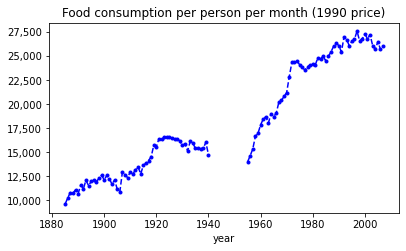

In [27]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_pre.plot(x = 'year_wst', y = 'food_cns_p90_mth', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
df_post.plot(x = 'year_wst', y = 'food_cns_p90_mth',  
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Food consumption per person per month (1990 price)')
plt.savefig('../../Notes/comb_food_cns.pdf')
plt.show()

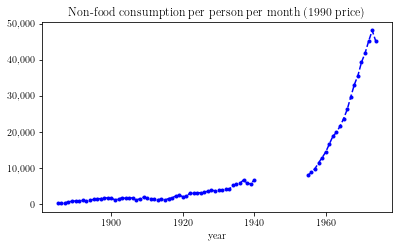

In [28]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_pre.plot(x = 'year_wst', y = 'non_food_cns_p90_mth', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
df_post[df_post.year_wst < 1975].plot(x = 'year_wst', y = 'non_food_cns_p90_mth',  
#df_post.plot(x = 'year_wst', y = 'non_food_cns_p90_mth',  
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Non-food consumption per person per month (1990 price)')
plt.savefig('../../Notes/comb_non_food_cns.pdf')
plt.show()

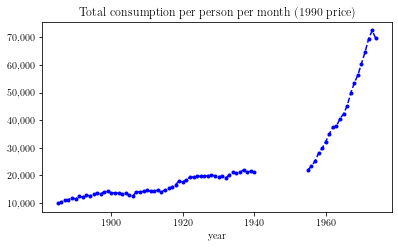

In [29]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_pre.plot(x = 'year_wst', y = 'tot_cns_p90_mth', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#df_post.plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
df_post[df_post.year_wst < 1975].plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
plt.xlabel('year')
cfig.set_size_inches(w=6.26894, h=3.5)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Total consumption per person per month (1990 price)')
plt.savefig('../../Notes/comb_tot_cns.pdf')
plt.show()

In [30]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'food_cns_p90_mth', ax = ax)
plt.title('Monthly food consumption per capita at 1990 prices')
plt.show()

RuntimeError: latex was not able to process the following string:
b'year_wst'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/satoshi/.matplotlib/tex.cache/b1c577d05baa4fd7eed19f0129453ce2.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file b1c577d05baa4fd7eed19f0129453ce2.aux.
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily year_
                     wst}
No pages of output.
Transcript written on b1c577d05baa4fd7eed19f0129453ce2.log.




<Figure size 432x288 with 1 Axes>

In [31]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'non_food_cns_p90_mth', ax = ax)
plt.title('Monthly total consumption per capita at 1990 prices')
plt.show()

RuntimeError: latex was not able to process the following string:
b'year_wst'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/satoshi/.matplotlib/tex.cache/b1c577d05baa4fd7eed19f0129453ce2.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file b1c577d05baa4fd7eed19f0129453ce2.aux.
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily year_
                     wst}
No pages of output.
Transcript written on b1c577d05baa4fd7eed19f0129453ce2.log.




<Figure size 432x288 with 1 Axes>

In [32]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'tot_cns_p90_mth', ax = ax)
plt.title('Monthly total consumption per capita at 1990 prices')
plt.show()

RuntimeError: latex was not able to process the following string:
b'year_wst'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/satoshi/.matplotlib/tex.cache/b1c577d05baa4fd7eed19f0129453ce2.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file b1c577d05baa4fd7eed19f0129453ce2.aux.
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily year_
                     wst}
No pages of output.
Transcript written on b1c577d05baa4fd7eed19f0129453ce2.log.




<Figure size 432x288 with 1 Axes>

In [33]:
df_merged.to_csv('../../Data/Combined/comb_cns.csv', index = False)

In [35]:
df_pi_post

,year_jpn,year_wst,pi_goods,pi_ag,pi_ind
0,30,1955,22.9,16.0,27.7
1,31,1956,22.9,15.7,27.6
2,32,1957,23.7,16.3,28.3
3,33,1958,23.2,16.1,27.9
4,34,1959,23.3,16.3,27.6
5,35,1960,24.1,16.9,28.3
6,36,1961,25.1,18.0,29.4
7,37,1962,26.6,19.6,30.7
8,38,1963,28.5,21.9,32.3
9,39,1964,29.3,22.5,33.3


In [59]:
df_pi_pre.loc[df_pi_pre.year_wst == '1955']

,year_wst,price_ind_agg,price_ind_consumer,price_ind_inv
64,1955,88.7,91.9,82.8


In [60]:
df_pi_post.loc[df_pi_post.year_wst == 1955]

,year_jpn,year_wst,pi_goods,pi_ag,pi_ind
0,30,1955,22.9,16.0,27.7


In [65]:
pi_pre_1955 = df_pi_pre.iloc[64, 3]

In [64]:
pi_post_1955 = df_pi_post.iloc[0, 4]

In [67]:
link = pi_pre_1955 / pi_post_1955

In [68]:
df_pi_pre['price_ind_inv_linked'] = df_pi_pre['price_ind_inv'] / link

In [96]:
df_temp_pre = df_pi_pre.iloc[:64, [0, 4]]

In [98]:
df_temp_pre.columns = ['year_wst', 'pi_ind']

In [94]:
df_temp_post = df_pi_post.iloc[:, [1, 4]]

In [99]:
df_temp_post.columns = ['year_wst', 'pi_ind']

In [104]:
df_temp = pd.concat([df_temp_pre, df_temp_post])

NameError: name 'cfig' is not defined

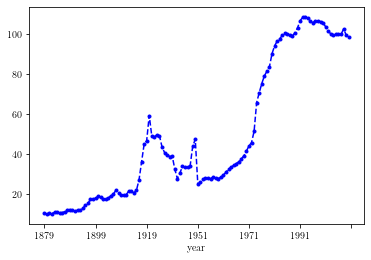

In [106]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_temp.plot(x = 'year_wst', y = 'pi_ind', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
plt.xlabel('year')
cfig.set_size_inches(w=6.26894, h=3.5)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Total consumption per person per month (1990 price)')
#plt.savefig('../../Notes/pi_ind.pdf')
plt.show()

In [110]:
df_temp = df_temp.year_wst.astype(int)

In [112]:
df_temp.to_csv('../../Data/Combined/comb_pi_ind.csv', index = False)